In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
def calc_risk_contribution(weights, cov_matrix):
    volatility = np.sqrt(weights.T @ cov_matrix @ weights)
    marginal_contribution = cov_matrix @ weights
    risk_contribution = np.multiply(weights, marginal_contribution)/volatility

    return risk_contribution

def risk_parity_objective(weights, cov_matrix):
    #Want risk contribution to be equal to each other
    risk_contribution = calc_risk_contribution(weights, cov_matrix)

    target = np.mean(risk_contribution)

    return np.sum((risk_contribution-target)**2)

def get_risk_parity_weights(cov_matrix):
    num_assets = len(cov_matrix)

    weights = np.ones(num_assets) / num_assets

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = [(0, 1) for i in range(num_assets)]

    result = minimize(risk_parity_objective, weights, args=(cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

In [3]:
def risk_parity_objective(weights, cov_matrix):
    #Want risk contribution to be equal to each other
    risk_contribution = calc_risk_contribution(weights, cov_matrix)

    target = np.mean(risk_contribution)

    return np.sum((risk_contribution-target)**2)

In [4]:
def get_risk_parity_weights(cov_matrix):
    num_assets = len(cov_matrix)

    weights = np.ones(num_assets) / num_assets

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = [(0, 1) for i in range(num_assets)]

    result = minimize(risk_parity_objective, weights, args=(cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

In [5]:
def calc_sharpe_ratio(returns, risk_free_rate):
    freq = 12  # Monthly data
    excess = returns - (risk_free_rate / freq)
    return np.mean(excess) / np.std(excess) * np.sqrt(freq)

In [7]:
dataset = pd.read_csv('drive/MyDrive/EE641 Project/clean_full_data.csv')

returns = dataset[[col for col in dataset.columns if 'return_30d' in col]]
returns = returns.clip(lower=-1, upper=1)

In [66]:
dataset

,Unnamed: 0,SPY_close,SPY_return_30d,SPY_vol_10d,AAPL_close,AAPL_return_30d,AAPL_vol_10d,MSFT_close,MSFT_return_30d,MSFT_vol_10d,...,MDT_vol_10d,BTC_close,BTC_return_30d,BTC_vol_10d,ETH_close,ETH_return_30d,ETH_vol_10d,market_regime,regime_name,is_weekend
0,2017-12-09,235.169754,0.038690,0.004711,39.800705,0.079848,0.008663,77.819023,0.073929,0.017360,...,0.012498,15178.200195,1.124733,0.105945,473.502014,0.475617,0.037869,2.0,Bull,True
1,2017-12-10,235.169754,0.038690,0.004711,39.800705,0.079848,0.008663,77.819023,0.073929,0.017360,...,0.012498,15455.400391,1.335309,0.106311,441.721008,0.476079,0.042822,2.0,Bull,True
2,2017-12-11,235.878296,0.033371,0.004637,40.576191,0.062808,0.011191,78.808418,0.022050,0.017652,...,0.010486,16936.800781,1.664024,0.107192,515.135986,0.637010,0.067349,2.0,Bull,False
3,2017-12-12,236.294617,0.039065,0.003736,40.348232,0.033572,0.011179,79.132042,0.025269,0.017313,...,0.010009,17415.400391,1.926924,0.106564,651.431030,1.115668,0.103800,2.0,Bull,False
4,2017-12-13,236.268005,0.037332,0.003708,40.482189,0.022771,0.008712,78.919350,0.031241,0.016063,...,0.009926,16408.199219,1.501444,0.111847,702.767029,1.218919,0.103744,2.0,Bull,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2024-12-27,593.225464,-0.000297,0.012133,255.309296,0.135350,0.012133,429.668457,0.014562,0.014135,...,0.008445,94164.859375,-0.018733,0.026862,3328.916992,-0.089776,0.036789,2.0,Bull,False
2576,2024-12-28,593.225464,-0.000297,0.012133,255.309296,0.135350,0.012133,429.668457,0.014562,0.014135,...,0.008445,95163.929688,-0.005107,0.022154,3397.902344,-0.050815,0.032827,2.0,Bull,True
2577,2024-12-29,593.225464,-0.000297,0.012133,255.309296,0.135350,0.012133,429.668457,0.014562,0.014135,...,0.008445,93530.226562,-0.040337,0.021433,3349.513428,-0.067895,0.028143,2.0,Bull,True
2578,2024-12-30,586.455811,-0.005309,0.012546,251.923019,0.105074,0.013197,423.979858,-0.002834,0.014422,...,0.009326,92643.210938,-0.039460,0.021360,3356.392578,-0.094263,0.027510,2.0,Bull,False


In [62]:
returns

,SPY_return_30d,AAPL_return_30d,MSFT_return_30d,AMZN_return_30d,GOOGL_return_30d,META_return_30d,NVDA_return_30d,TSLA_return_30d,BRK-B_return_30d,UNH_return_30d,...,COP_return_30d,RTX_return_30d,CAT_return_30d,BMY_return_30d,SBUX_return_30d,GS_return_30d,INTU_return_30d,MDT_return_30d,BTC_return_30d,ETH_return_30d
0,0.038690,0.079848,0.073929,0.194945,0.058462,0.049053,-0.020783,-0.033847,0.041514,0.074186,...,0.002138,0.030148,0.050533,0.024118,0.073037,0.038957,0.025772,0.007832,1.000000,0.475617
1,0.038690,0.079848,0.073929,0.194945,0.058462,0.049053,-0.020783,-0.033847,0.041514,0.074186,...,0.002138,0.030148,0.050533,0.024118,0.073037,0.038957,0.025772,0.007832,1.000000,0.476079
2,0.033371,0.062808,0.022050,0.061738,0.017704,0.006521,-0.034998,0.025057,0.043003,0.051374,...,0.009373,0.041727,0.043248,0.051385,0.082050,0.038087,0.014466,-0.000369,1.000000,0.637010
3,0.039065,0.033572,0.025269,0.048819,0.015138,-0.016178,-0.063125,0.065452,0.059729,0.066150,...,0.011092,0.036632,0.050773,0.040105,0.080007,0.073061,0.029053,0.018254,1.000000,1.000000
4,0.037332,0.022771,0.031241,0.053244,0.017763,-0.009774,-0.099128,0.022622,0.055954,0.070819,...,0.010361,0.044126,0.094035,0.029355,0.090539,0.057255,0.036155,0.017387,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,-0.000297,0.135350,0.014562,0.045072,0.078829,0.034989,-0.063243,0.307110,-0.024760,-0.155023,...,-0.133250,-0.051866,-0.057380,-0.012498,-0.069934,-0.025555,-0.095830,-0.074246,-0.018733,-0.089776
2576,-0.000297,0.135350,0.014562,0.045072,0.078829,0.034989,-0.063243,0.307110,-0.024760,-0.155023,...,-0.133250,-0.051866,-0.057380,-0.012498,-0.069934,-0.025555,-0.095830,-0.074246,-0.005107,-0.050815
2577,-0.000297,0.135350,0.014562,0.045072,0.078829,0.034989,-0.063243,0.307110,-0.024760,-0.155023,...,-0.133250,-0.051866,-0.057380,-0.012498,-0.069934,-0.025555,-0.095830,-0.074246,-0.040337,-0.067895
2578,-0.005309,0.105074,-0.002834,0.046435,0.090438,0.025222,-0.063100,0.341378,-0.033226,-0.140609,...,-0.140188,-0.025953,-0.062861,-0.041709,-0.081525,-0.020759,-0.100548,-0.066293,-0.039460,-0.094263


In [60]:
returns.describe()

,SPY_return_30d,AAPL_return_30d,MSFT_return_30d,AMZN_return_30d,GOOGL_return_30d,META_return_30d,NVDA_return_30d,TSLA_return_30d,BRK-B_return_30d,UNH_return_30d,...,COP_return_30d,RTX_return_30d,CAT_return_30d,BMY_return_30d,SBUX_return_30d,GS_return_30d,INTU_return_30d,MDT_return_30d,BTC_return_30d,ETH_return_30d
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,0.018142,0.036014,0.032496,0.028440,0.025136,0.030219,0.073025,0.080099,0.017729,0.020577,...,0.025619,0.015478,0.026292,0.006939,0.016080,0.022996,0.029806,0.006878,0.052746,0.066805
std,0.057024,0.103385,0.072297,0.106389,0.085476,0.137841,0.182328,0.259071,0.062825,0.075099,...,0.139482,0.091963,0.104723,0.082235,0.092105,0.100834,0.091857,0.074222,0.237597,0.305285
min,-0.324922,-0.298909,-0.258516,-0.377657,-0.287321,-0.395099,-0.455544,-0.592790,-0.286965,-0.323338,...,-0.595850,-0.519820,-0.320519,-0.299623,-0.359668,-0.429432,-0.339283,-0.386969,-0.603168,-0.582191
25%,-0.008752,-0.027370,-0.012452,-0.035860,-0.027479,-0.052548,-0.035916,-0.103424,-0.015471,-0.027534,...,-0.054435,-0.031462,-0.045641,-0.045103,-0.043749,-0.035331,-0.024143,-0.041433,-0.092764,-0.129413
50%,0.027952,0.035662,0.037732,0.033804,0.034192,0.034966,0.069487,0.033044,0.021434,0.020356,...,0.010806,0.021179,0.028537,0.009189,0.017683,0.018142,0.036179,0.010448,0.017800,0.016284
75%,0.050993,0.109407,0.082429,0.098723,0.080031,0.103364,0.177055,0.216307,0.057245,0.061661,...,0.098153,0.068365,0.096839,0.063841,0.071879,0.081646,0.086150,0.059069,0.175473,0.215574
max,0.283651,0.385793,0.329313,0.437556,0.279747,0.648934,0.590220,1.195476,0.212180,0.503849,...,0.857080,0.404476,0.450953,0.333359,0.362152,0.326568,0.412658,0.350970,1.926924,1.942445


In [8]:
covariance_matrix = returns.cov()
risk_parity_weights = get_risk_parity_weights(covariance_matrix)
risk_parity_returns = np.dot(returns, risk_parity_weights)


In [64]:
risk_parity_weights

array([0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302,
       0.01587302, 0.01587302, 0.01587302])

In [57]:
risk_parity_returns

array([ 0.06139692,  0.06474671,  0.07074251, ..., -0.01662523,
       -0.02233913, -0.02233913])

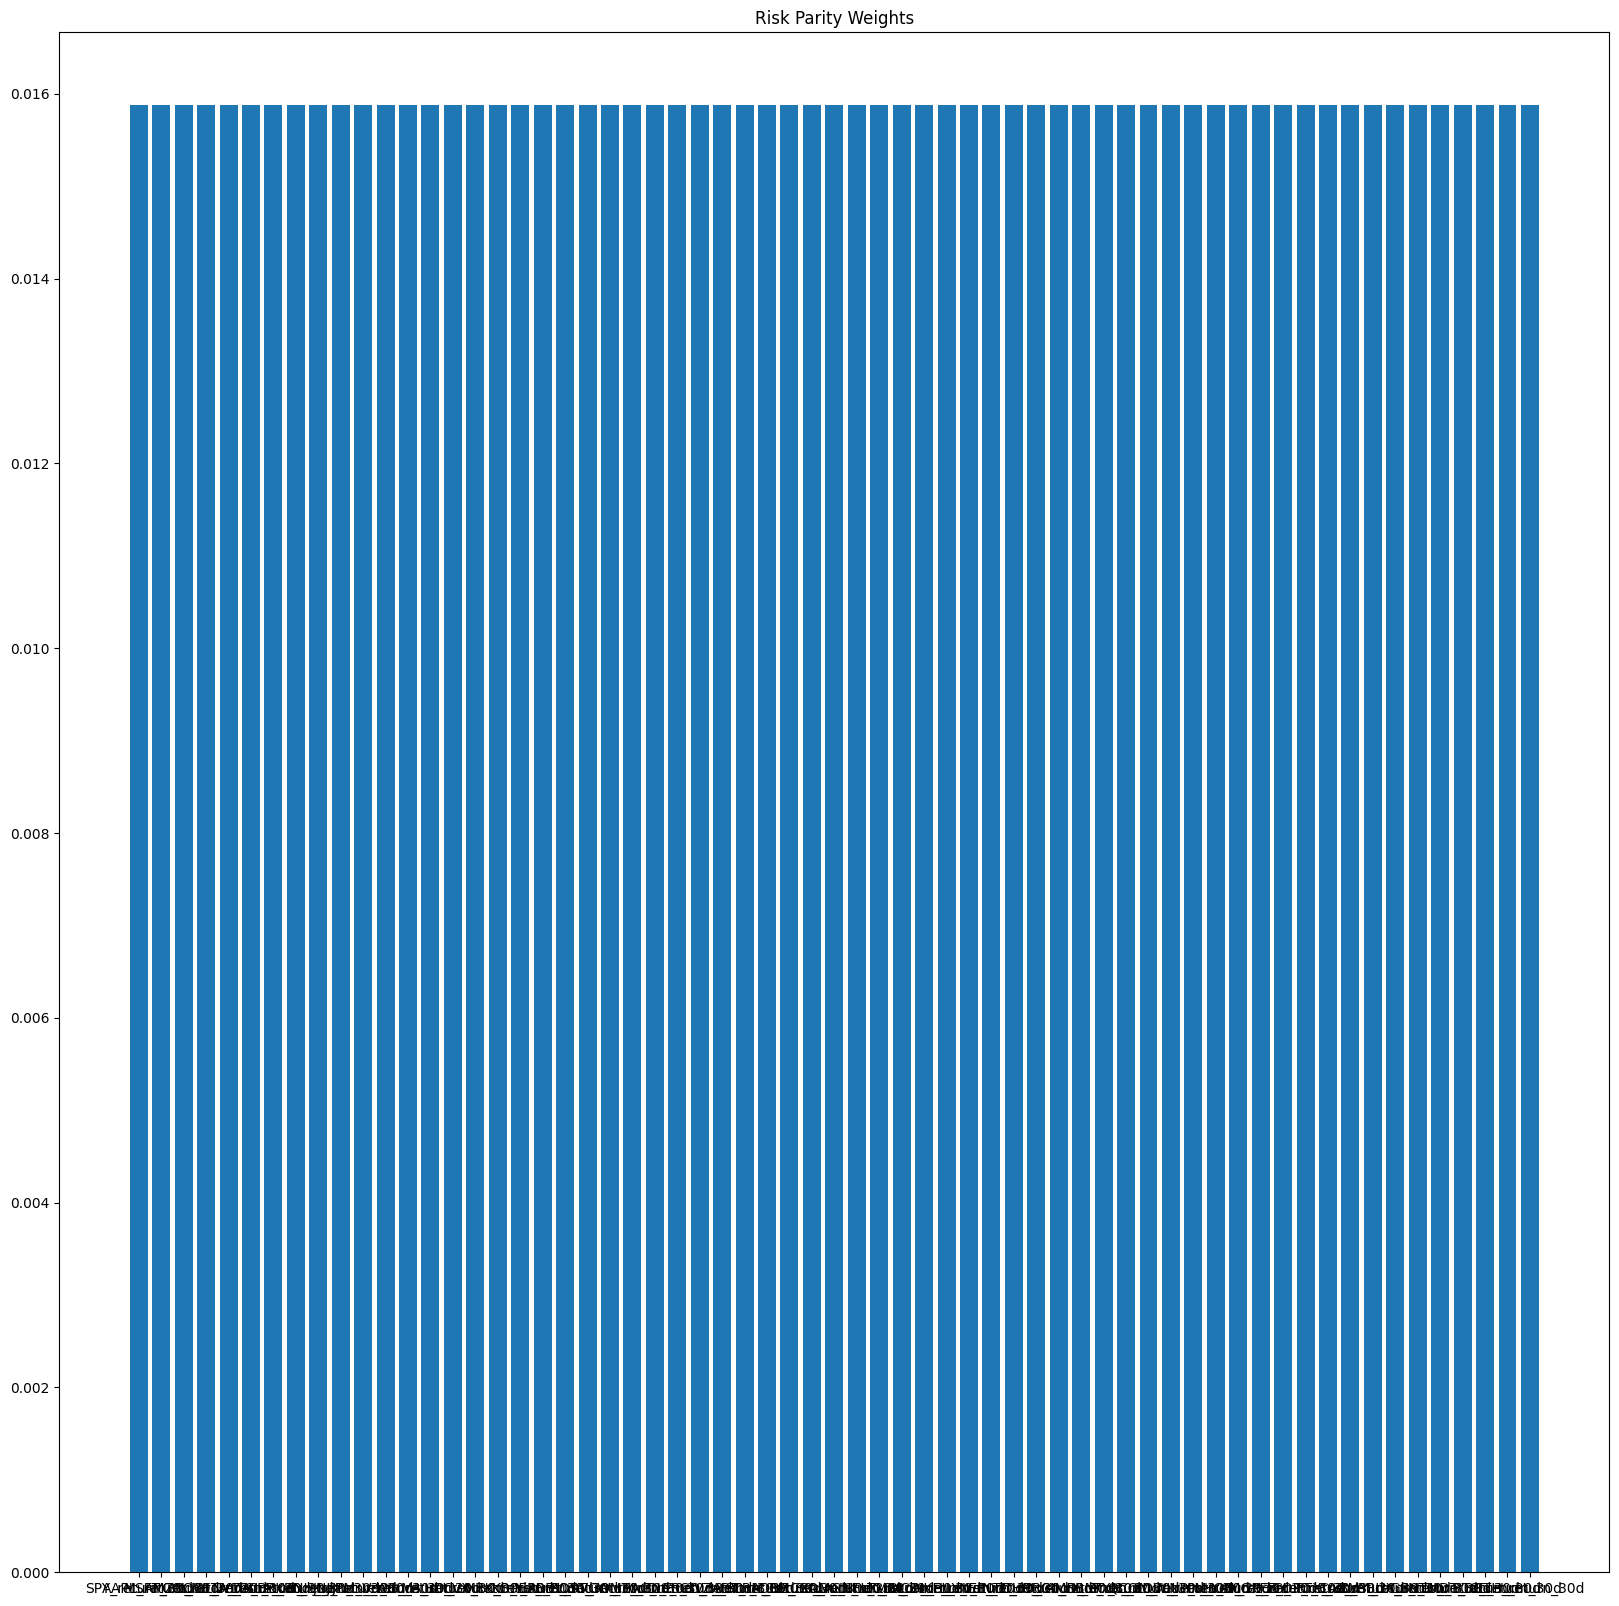

In [10]:
plt.figure(figsize=(20, 20))
plt.title('Risk Parity Weights')
plt.bar(returns.columns, risk_parity_weights)
plt.show()

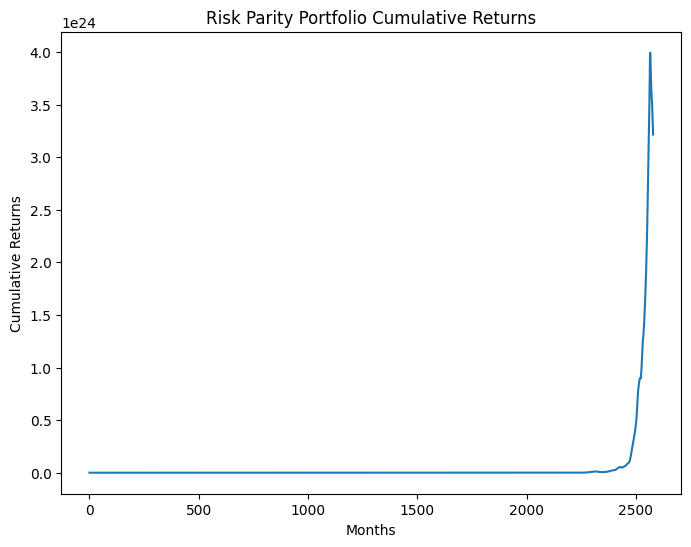

In [65]:
plt.figure(figsize=(8, 6))
plt.title('Risk Parity Portfolio Cumulative Returns')
plt.ylabel('Cumulative Returns')
plt.xlabel('Months')

plt.plot((1 + risk_parity_returns).cumprod())

plt.show()